# Population Prediction

### Luis Garduno

## 1. Load Dataset

Datasets [Kaggle]: [__International Database (IDB)__](https://www2.census.gov/programs-surveys/international-programs/about/idb/idbzip.zip)

Question Of Interest : Predict the population of earth in 2122.
    






In [1]:
import numpy as np
import pandas as pd

# Load dataset into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/luisegarduno/MachineLearning_Projects/master/data/idb5yr.all', delimiter='|', encoding='ISO-8859-1')
print("--> Columns:", df.columns.values)

--> Columns: ['#YR' 'TFR' 'SRB' 'RNI' 'POP95_99' 'POP90_94' 'POP85_89' 'POP80_84'
 'POP75_79' 'POP70_74' 'POP65_69' 'POP60_64' 'POP5_9' 'POP55_59'
 'POP50_54' 'POP45_49' 'POP40_44' 'POP35_39' 'POP30_34' 'POP25_29'
 'POP20_24' 'POP15_19' 'POP10_14' 'POP100_' 'POP0_4' 'POP' 'NMR' 'NAME'
 'MR1_4' 'MR0_4' 'MPOP95_99' 'MPOP90_94' 'MPOP85_89' 'MPOP80_84'
 'MPOP75_79' 'MPOP70_74' 'MPOP65_69' 'MPOP60_64' 'MPOP5_9' 'MPOP55_59'
 'MPOP50_54' 'MPOP45_49' 'MPOP40_44' 'MPOP35_39' 'MPOP30_34' 'MPOP25_29'
 'MPOP20_24' 'MPOP15_19' 'MPOP10_14' 'MPOP100_' 'MPOP0_4' 'MPOP' 'MMR1_4'
 'MMR0_4' 'IMR_M' 'IMR_F' 'IMR' 'GRR' 'GR' 'FPOP95_99' 'FPOP90_94'
 'FPOP85_89' 'FPOP80_84' 'FPOP75_79' 'FPOP70_74' 'FPOP65_69' 'FPOP60_64'
 'FPOP5_9' 'FPOP55_59' 'FPOP50_54' 'FPOP45_49' 'FPOP40_44' 'FPOP35_39'
 'FPOP30_34' 'FPOP25_29' 'FPOP20_24' 'FPOP15_19' 'FPOP10_14' 'FPOP100_'
 'FPOP0_4' 'FPOP' 'FMR1_4' 'FMR0_4' 'GENC' 'FIPS' 'E0_M' 'E0_F' 'E0' 'CDR'
 'CBR' 'ASFR45_49' 'ASFR40_44' 'ASFR35_39' 'ASFR30_34' 'ASFR25_29'
 'ASFR

-------------------------------------
  
## 2. Data Understanding

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.1 Data Description

In [70]:
# Make year column easier to understand
df.rename(columns={'#YR':'YEAR'}, inplace=True)

# Remove every column except for year & population
for col in df.columns.values:
    if col != 'YEAR' and col != 'POP':
        df.drop(col, axis=1, inplace=True)

# Group by year & get sum
df_yr = df.groupby(by='YEAR')
df_yr = df_yr['POP'].sum()

# Create a new dataframe with new data (1951 - 2100)
pop_sum = []
for i in range(1951, 2022):
    pop_sum.append(df_yr[i])
df_pop = pd.DataFrame({'YEAR': list(range(1951, 2022)), 'POP': pop_sum})
df = df_pop

print(f'--> Current Population (2021): {round(df_pop.POP[70]):,d}\n')
df_pop.tail(5)

--> Current Population (2021): 7,831,718,605



,YEAR,POP
66,2017,7516769535
67,2018,7597066210
68,2019,7676686052
69,2020,7756873419
70,2021,7831718605


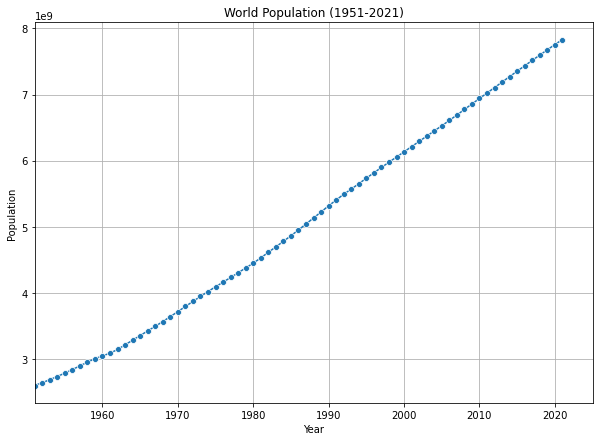

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize=(10,7))
plt.grid()
ax = sns.lineplot(data=df, x='YEAR', y='POP', marker='o', dashes=False)
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('World Population (1951-2021)')
plt.xlim(1951, 2025)

plt.show()

## 3. Modeling

Derived the formula for calculating the optimal values of the regression weights:

$$ w = (X^TX)^{-1}X^Ty $$

where $X$ is the matrix of values with a bias column of ones appended onto it.
For the population dataset one could construct this $X$ matrix by stacking a column of ones onto the `df_pop.YEAR` matrix. 

$$ X=\begin{bmatrix}
         & \vdots &        &  1 \\
        \dotsb & \text{ds.data} & \dotsb &  \vdots\\
         & \vdots &         &  1\\
     \end{bmatrix}
$$

In [4]:
# Define X & Y
if 'POP' in df_pop:
    y = df_pop['POP'].values
    del df_pop['POP']
    X = df_pop.to_numpy()

In [ ]:
# Create a matrix full of ones & stack 2 matrices horizontally
X = np.hstack((np.ones((len(X), 1)), X))

# Calculate optimal values of the regression weights
w = np.linalg.inv(X.T @ X) @ X.T @ y


print("\n++++++++++++++ WEIGHTS +++++++++++++++++\n" + "Shape:", w.shape, "\n", pd.DataFrame(data=w))
diff = np.round(( (y - (abs(np.dot(X,w) - y))) / y ) * 100, 2)
print("\n============= TARGET PERCENT ACCURACY ===============\n", pd.DataFrame(data=diff))

In [ ]:
print("Linear Equation:")
print("h =", w[0], "* x + (" + str(w[1]) + ")\n")

print("--> Estimated Population for 2122:", np.dot([1,2021], w))
print("--> Estimated Population for 2122:", np.dot([1,2021], w) + 77709067.94568211)


---------------------------

To predict the output from our model, $\hat{y}$, from $w$ and $X$ we need to use $\hat{y}=w^TX^T$, for row vector $\hat{y}$

In [ ]:
yHat_np = w.T @ X.T        # Shape : (1,71)
yHat_np = yHat_np.ravel()  # Shape : (71,)

predi = [2022] * yHat_np
print(predi)

print(yHat_np)

In [5]:
X_b = np.c_[np.ones((len(X), 1)), X]  # add x0 = 1 to each instance
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta)

[-1.49293911e+11  7.77090679e+07]


In [32]:
X_new = np.array([[0], [2122]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta)
y_predict

array([-1.49293911e+11,  1.56047315e+10])

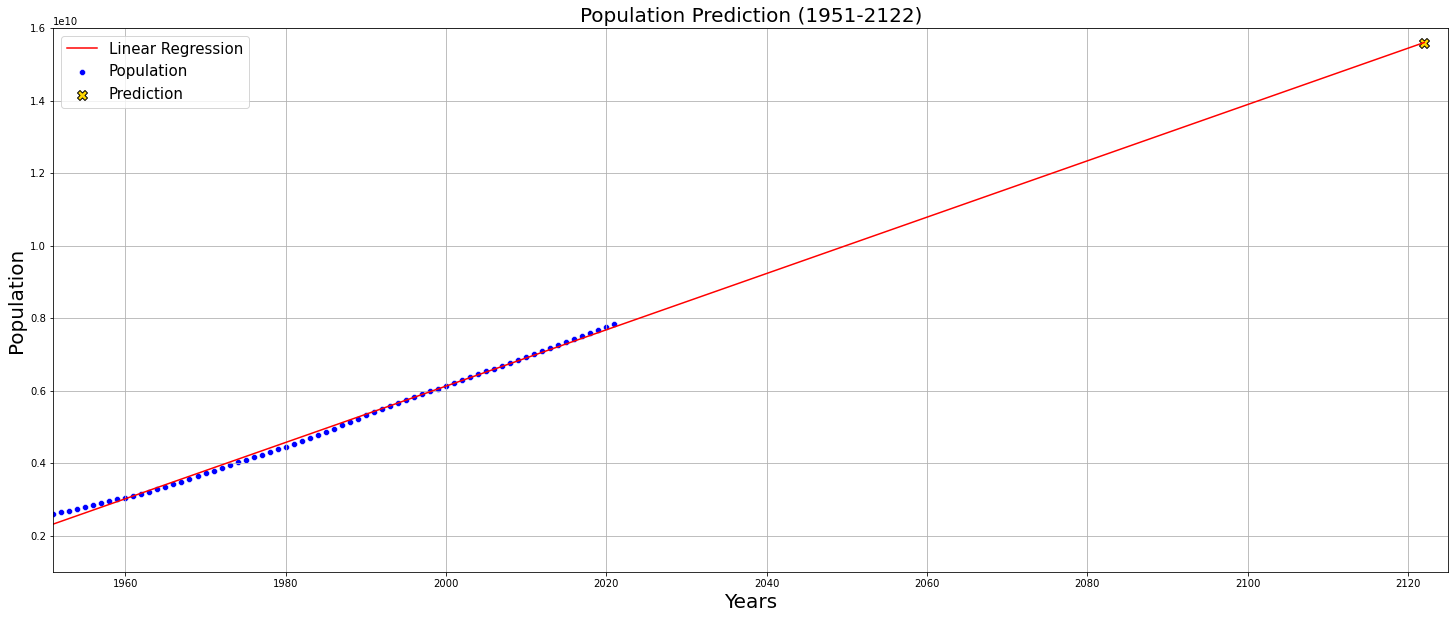

Estimated Population (2122): 15,604,731,527


In [153]:

plt.subplots(figsize=(25,10))
plt.grid()
#ax = sns.lineplot(data=df, x='YEAR', y='POP', markers='b.')
#plt.plot(X, y, "b.")

#plt.scatter(X_new[1], y_predict[1], c="gold", s=500, marker="X", linewidth=3, edgecolor='k')
plt.plot(X_new, y_predict, "r-", color='red')
sns.scatterplot(data=df, x='YEAR', y='POP', color='blue')
sns.scatterplot(x=X_new[1], y=y_predict[1], s=100, marker="X", linewidth=1, edgecolor='k', color='gold')


#plt.plot(X_new[1], y_predict[1], 'xb', markersize=50)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.title('Population Prediction (1951-2122)', fontsize=20)
plt.axis([1951, 2125, 1000000000, 16000000000])
plt.legend(["Linear Regression", "Population", "Prediction"], prop={'size': 15})
plt.show()

print(f'Estimated Population (2122): {round(y_predict[1]):,d}')